<a href="https://colab.research.google.com/github/mithila20/CSE299/blob/main/ANNRNNLSTMSp2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [1]:
!touch requirements.txt

In [2]:
!pip install -r requirements.txt

In [3]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


# Data Prepossessing

### Downloading Dataset from kaggle

In [4]:
import os

os.environ['KAGGLE_USERNAME'] = "imostafizur" # username from the json file
os.environ['KAGGLE_KEY'] = "209f4b70995998e465b2702534f7a5ff" # key from the json file

In [5]:
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 89% 72.0M/80.9M [00:00<00:00, 109MB/s] 
100% 80.9M/80.9M [00:00<00:00, 88.2MB/s]


In [6]:
!unzip sentiment140.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


## Dataset analysis

In [7]:
import pandas as pd
import re

In [8]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1')

In [9]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


### Check the columns of the DataFrame

In [10]:
print(df.columns)

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')


In [11]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


### Rename the column

In [12]:
df.columns = ['Target', 'Id', 'Date', 'Flag', 'User', 'Tweet']

In [13]:
df.head()

,Target,Id,Date,Flag,User,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [14]:
print(df.columns)

Index(['Target', 'Id', 'Date', 'Flag', 'User', 'Tweet'], dtype='object')


### Drop 'Id', 'Date', 'Flag', 'User' column.

In [15]:
df.drop(['Id', 'Date', 'Flag', 'User'], axis=1, inplace=True)

In [16]:
print(df.columns)

Index(['Target', 'Tweet'], dtype='object')


In [17]:
df.head()

,Target,Tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [18]:
df['Target'].value_counts()

Target
4    800000
0    799999
Name: count, dtype: int64

### Check null value

In [19]:
df.isnull().sum()

Target    0
Tweet     0
dtype: int64

### Number of Url

In [20]:
url_pattern = re.compile(r'http\S+|www\S+|https\S+')
url_count = df['Tweet'].str.contains(url_pattern).sum()
print(f"Number of texts with URLs: {url_count}")

Number of texts with URLs: 81116


### Number of emoji

In [21]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
emoji_count = df['Tweet'].str.contains(emoji_pattern).sum()
print(f"Number of texts with emojis: {emoji_count}")


Number of texts with emojis: 0


### Number of Special character

In [22]:
special_char_pattern = re.compile(r'[^A-Za-z0-9\s]')
special_char_count = df['Tweet'].str.contains(special_char_pattern).sum()
print(f"Number of texts with special characters: {special_char_count}")

Number of texts with special characters: 1449771


### Data Cleaning

In [23]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)

    return text


In [24]:
# prompt: Apply dataclean to the cloumn Text

df['Tweet'] = df['Tweet'].apply(clean_text)


In [25]:
df.to_csv('cleaned_twitter_dataset.csv', index=False)

<Axes: xlabel='Target'>

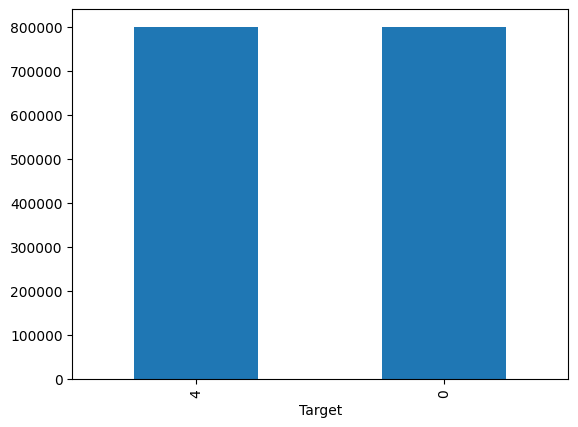

In [26]:
# prompt: show graph of Target
df['Target'].value_counts().plot(kind='bar')

In [27]:
df = pd.read_csv('cleaned_twitter_dataset.csv')

In [28]:
df.head()

,Target,Tweet
0,0,is upset that he cant update his Facebook by t...
1,0,Kenichan I dived many times for the ball Manag...
2,0,my whole body feels itchy and like its on fire
3,0,nationwideclass no its not behaving at all im ...
4,0,Kwesidei not the whole crew


In [29]:
# Number of Tweets

num_tweets = df.shape[0]
print(f"Number of tweets: {num_tweets}")


Number of tweets: 1599999


> Dataset is too large One million five hundred ninety-nine thousand nine hundred ninety-nine.

### Sample 1000 tweets randomly

In [30]:
sampled_df = df.sample(n=1000, random_state=42)

In [31]:
sampled_df.to_csv('sampled_tweets.csv', index=False)

In [32]:
df = pd.read_csv('sampled_tweets.csv')

In [33]:
num_tweets = df.shape[0]
print(f"Number of tweets: {num_tweets}")

Number of tweets: 1000


### cloumn of sampled_tweets.csv

In [34]:
print(df.columns)

Index(['Target', 'Tweet'], dtype='object')


RoBERTa (Facebook), StructBERT (Alibaba), DeBERTa (Microsoft), DistilBERT (Hugging Face)

## Tokenization using Huggingface

In [35]:
import pandas as pd
from datasets import Dataset, Features, Value, Sequence
import transformers

# Load the dataset
df = pd.read_csv("sampled_tweets.csv", index_col=0)

# Define the features - REMOVE EXTRA KEYS
features = Features({
    "Tweet": Value("string"),
})

# Initialize the dataset
dataset = Dataset.from_dict(df, features=features)

# Load the tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize the dataset
def tokenize_function(example):
    return tokenizer(example["Tweet"])

tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Save the tokenized dataset
tokenized_dataset.save_to_disk("tokenized_sampled_tweets")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1000 [00:00<?, ? examples/s]

# LSTM

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
import re

# Step 1: Load and preprocess the dataset
data = pd.read_csv('sampled_tweets.csv')
# Encode the target variable (0 = negative, 4 = positive)
data['Target'] = data['Target'].apply(lambda x: 1 if x == 4 else 0)

# Split the data into training and testing sets
X = data['Tweet']
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad the sequences
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)

# Build the LSTM model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

#Train the LSTM model
epochs = 5
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {accuracy}')


Found 3109 unique tokens.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 250, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5080501 (19.38 MB)
Trainable params: 5080501 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
13/13 - 21s - loss: 0.6927 - accuracy: 0.4963 - val_loss: 0.6890 - 

### Save the model

In [37]:
model.save('sentiment_lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Save the model and test

In [38]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model

In [39]:
# Load the model
loaded_model = load_model('sentiment_lstm_model.h5')

# Test with a sample sentence
sample_sentence = "I love this product! It's amazing."
cleaned_sentence = clean_text(sample_sentence)
sequence = tokenizer.texts_to_sequences([cleaned_sentence])
padded_sequence = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)
prediction = loaded_model.predict(padded_sequence)

# Convert prediction to label
predicted_label = 'positive' if prediction[0][0] > 0.5 else 'negative'
print(f'The sentiment of the sample sentence is: {predicted_label}')

1/1 [==============================] - 0s 320ms/step
The sentiment of the sample sentence is: negative


# RNN

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, SpatialDropout1D
import re

# Step 1: Load and preprocess the dataset
data = pd.read_csv('sampled_tweets.csv')

# Encode the target variable (0 = negative, 4 = positive)
data['Target'] = data['Target'].apply(lambda x: 1 if x == 4 else 0)

# Split the data into training and testing sets
X = data['Tweet']
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Tokenize and pad the sequences
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)

# Step 3: Build the RNN model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

# Step 4: Train the RNN model
epochs = 5
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {accuracy}')

Found 3109 unique tokens.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 250, 100)          0         
 alDropout1D)                                                    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5020201 (19.15 MB)
Trainable params: 5020201 (19.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
13/13 - 11s - loss: 0.7327 - accuracy: 

### Save the model

In [41]:
model.save('sentiment_rnn_model.h5')
print('Model saved to sentiment_rnn_model.h5')

Model saved to sentiment_rnn_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Load the model

In [42]:
loaded_model = load_model('sentiment_rnn_model.h5')

# Test with a sample sentence
sample_sentence = "I love this product! It's amazing."
cleaned_sentence = clean_text(sample_sentence)
sequence = tokenizer.texts_to_sequences([cleaned_sentence])
padded_sequence = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)
prediction = loaded_model.predict(padded_sequence)

# Convert prediction to label
predicted_label = 'positive' if prediction[0][0] > 0.5 else 'negative'
print(f'The sentiment of the sample sentence is: {predicted_label}')

1/1 [==============================] - 0s 154ms/step
The sentiment of the sample sentence is: positive


# ANN

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten
import re

# Step 1: Load and preprocess the dataset
data = pd.read_csv('sampled_tweets.csv')

# Encode the target variable (0 = negative, 4 = positive)
data['Target'] = data['Target'].apply(lambda x: 1 if x == 4 else 0)

# Split the data into training and testing sets
X = data['Tweet']
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Tokenize and pad the sequences
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)

# Step 3: Build the ANN model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

# Step 4: Train the ANN model
epochs = 5
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {accuracy}')





Found 3109 unique tokens.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 flatten (Flatten)           (None, 25000)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               12800512  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)            

### Save the model

In [44]:
# Save the model
model.save('sentiment_ann_model.h5')
print('Model saved to sentiment_ann_model.h5')

# Load the model
loaded_model = load_model('sentiment_ann_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to sentiment_ann_model.h5


### Test the model

In [45]:
# Test with a sample sentence
sample_sentence = "I love this product! It's amazing."
cleaned_sentence = clean_text(sample_sentence)
sequence = tokenizer.texts_to_sequences([cleaned_sentence])
padded_sequence = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)
prediction = loaded_model.predict(padded_sequence)

# Convert prediction to label
predicted_label = 'positive' if prediction[0][0] > 0.5 else 'negative'
print(f'The sentiment of the sample sentence is: {predicted_label}')

1/1 [==============================] - 0s 67ms/step
The sentiment of the sample sentence is: positive
